## Library

In [107]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

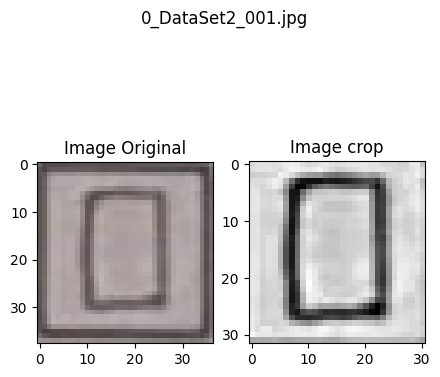

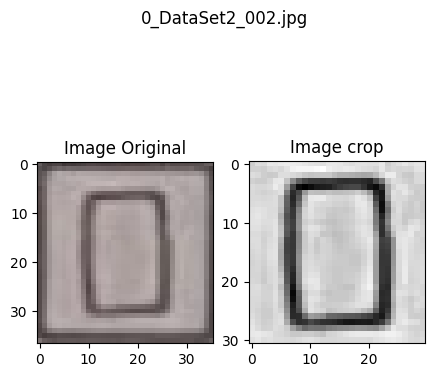

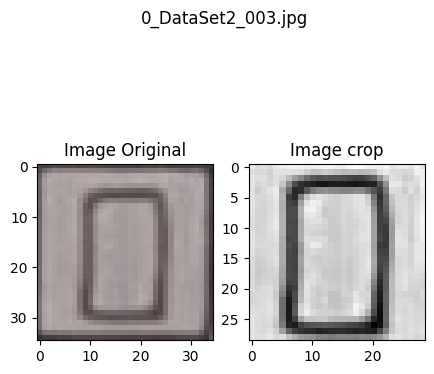

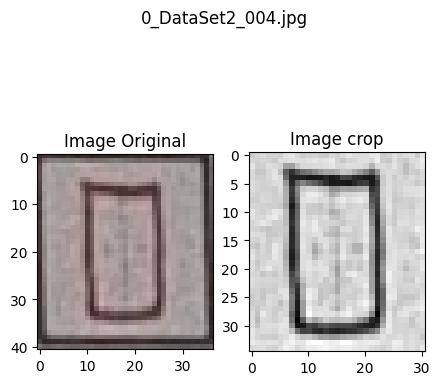

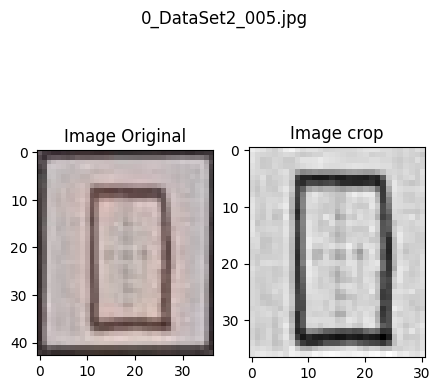

In [77]:
# Directory containing the images
file_image = './Data/DataSet_02'

# Get a list of all files in the directory
file_path = os.listdir(file_image)

# Directory to save processed images
output_dir = './Proses/crop/'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Menginisialisasi penghitung untuk gambar yang ditampilkan
dis_count = 0

for filename in file_path:
    if filename.endswith('.jpg'):
        # Construct full file path
        full_path = os.path.join(file_image, filename)
        
        label = int(filename.split('_')[0])
        
        # Read the original image using OpenCV
        original_image = cv.imread(full_path)
        
        # Convert image to grayscale
        gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
        
        # Find contours
        contours, _ = cv.findContours(gray_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            # Get bounding box for each contour
            x, y, w, h = cv.boundingRect(contour)
            
            # Crop the character from the image
            x_crop = max(0, x + 3)
            y_crop = max(0, y + 3)
            w_crop = max(0, w - 6)
            h_crop = max(0, h - 6)
            
            if w_crop > 0 and h_crop > 0:
                cropped_image = gray_image[y_crop:y_crop + h_crop, x_crop:x_crop + w_crop]

        #  Menambah simpan hasil cropped_image
        output_filename = os.path.join(output_dir, filename)
        cv.imwrite(output_filename, cropped_image)
        
        if dis_count < 5 :
            fig, axs = plt.subplots(1, 2, figsize=(5,5))
            fig.suptitle(filename)
            axs[0].imshow(original_image, cmap='gray')
            axs[0].set_title('Image Original')
            axs[1].imshow(cropped_image, cmap='gray')
            axs[1].set_title('Image crop')
            plt.show()
            dis_count += 1

## Preprocessing

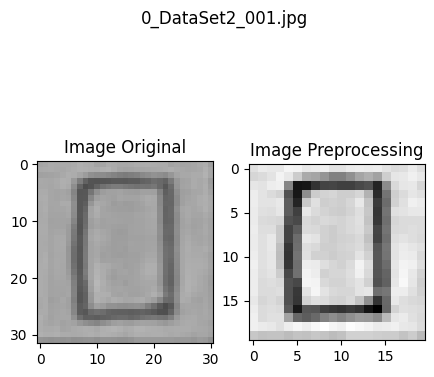

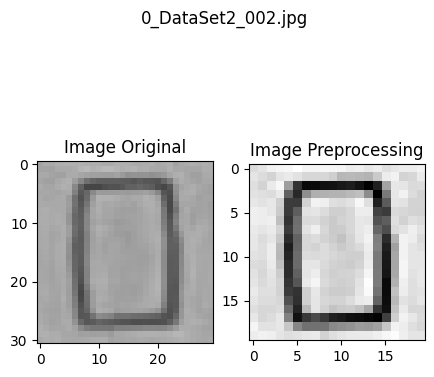

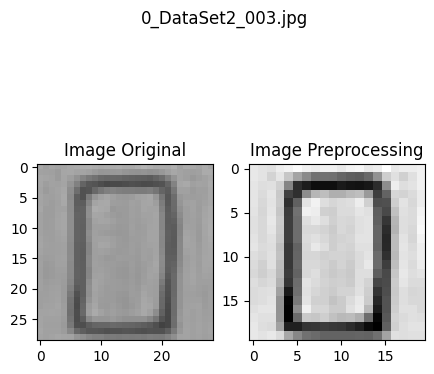

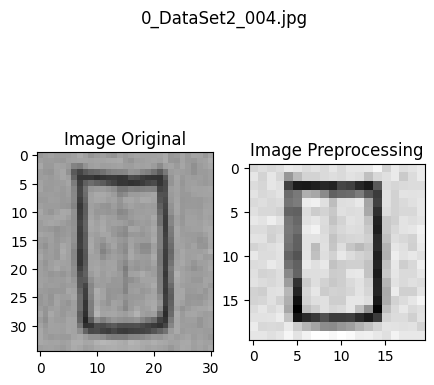

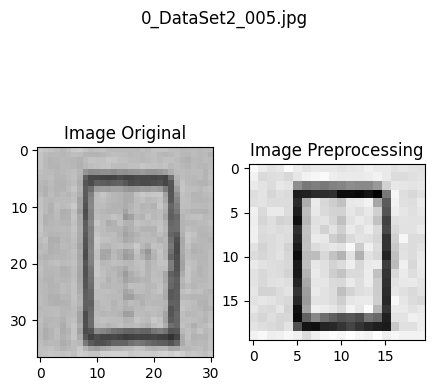

In [89]:

# Directory containing the images
file_image = './Proses/crop'

# Get a list of all files in the directory
file_path = os.listdir(file_image)

# Buat list untuk menyimpan fitur dan label
features_no = []
labels_no = []

# Directory to save processed images
output_dir = './Proses/Pre/'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Menginisialisasi penghitung untuk gambar yang ditampilkan
dis_count = 0

for filename in file_path:
    if filename.endswith('.jpg'):
        # Construct full file path
        full_path = os.path.join(file_image, filename)
        
        label = int(filename.split('_')[0])
        
        # Read the original image using OpenCV
        original_image = cv.imread(full_path, cv.IMREAD_GRAYSCALE)

        resize_image = cv.resize(original_image, (20,20))
        
        feature_vector = resize_image.flatten()
        
        features_no.append(feature_vector)
        labels_no.append(label)
        
        #  Menambah simpan hasil cropped_image
        output_filename = os.path.join(output_dir, filename)
        cv.imwrite(output_filename, resize_image)
        
        if dis_count < 5 :
            fig, axs = plt.subplots(1, 2, figsize=(5,5))
            fig.suptitle(filename)
            axs[0].imshow(cv.cvtColor(original_image, cv.COLOR_RGB2BGR))
            axs[0].set_title('Image Original')
            axs[1].imshow(resize_image, cmap='gray')
            axs[1].set_title('Image Preprocessing')
            plt.show()
            dis_count += 1

### Esktraksi fitur

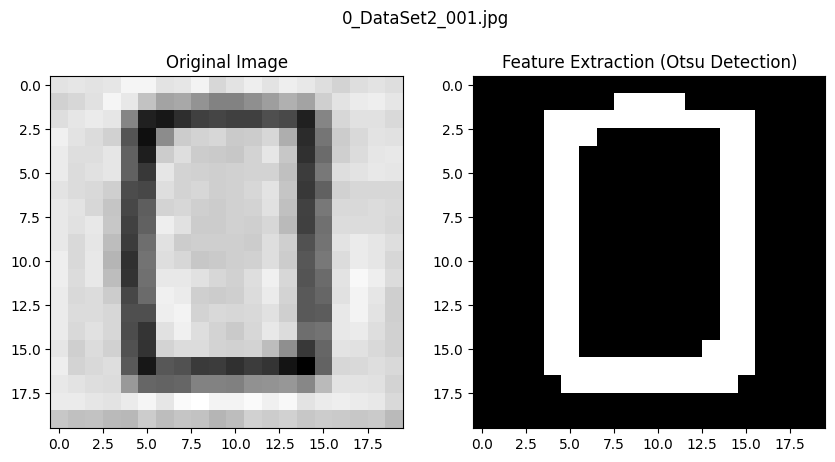

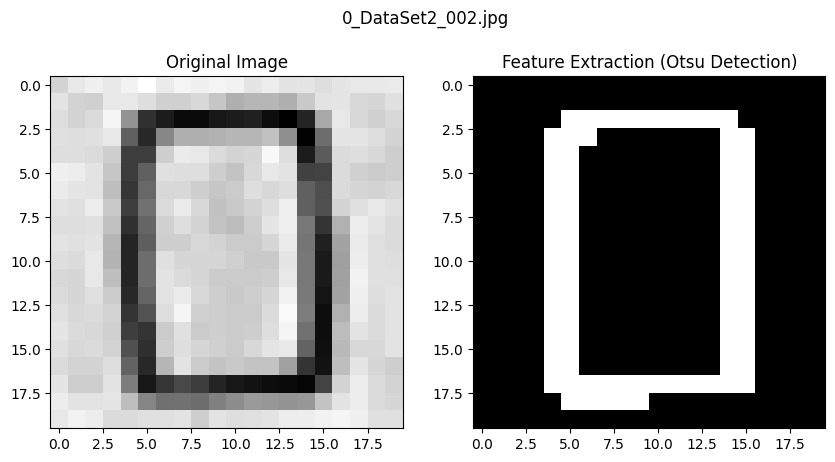

In [90]:

# Directory containing the preprocessed images
input_dir = './Proses/Pre/'

# Directory to save feature extraction results
output_dir = './Proses/EksOtsu/'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Buat list untuk menyimpan fitur dan label
features = []
labels = []

# Get a list of all files in the input directory
file_path = os.listdir(input_dir)

# Menginisialisasi penghitung untuk gambar yang ditampilkan
dis_count = 0

# Iterate over each file in the directory
for filename in file_path:
    # Check if the file is an image file
    if filename.endswith('.jpg'):
        # Construct full file paths
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        label = int(filename.split('_')[0])
        
        # Read the preprocessed image using OpenCV
        preprocessed_image = cv.imread(input_path, cv.IMREAD_GRAYSCALE)
        
        resize_image = cv.resize(preprocessed_image, (20,20))
        
        # Apply Otsu's thresholding
        _, otsu_image = cv.threshold(resize_image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
        
        feature_vector = otsu_image.flatten()
        
        # Save the feature-extracted image
        cv.imwrite(output_path, otsu_image)
            
        features.append(feature_vector)
        labels.append(label)
        
        if dis_count < 2 :
            # Display the original and feature-extracted images
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            fig.suptitle(filename)
            axs[0].imshow(preprocessed_image, cmap='gray')
            axs[0].set_title('Original Image')
            axs[1].imshow(otsu_image, cmap='gray')
            axs[1].set_title('Feature Extraction (Otsu Detection)')
            plt.show()
            dis_count += 1

### Local Binary Pattern (LBP)

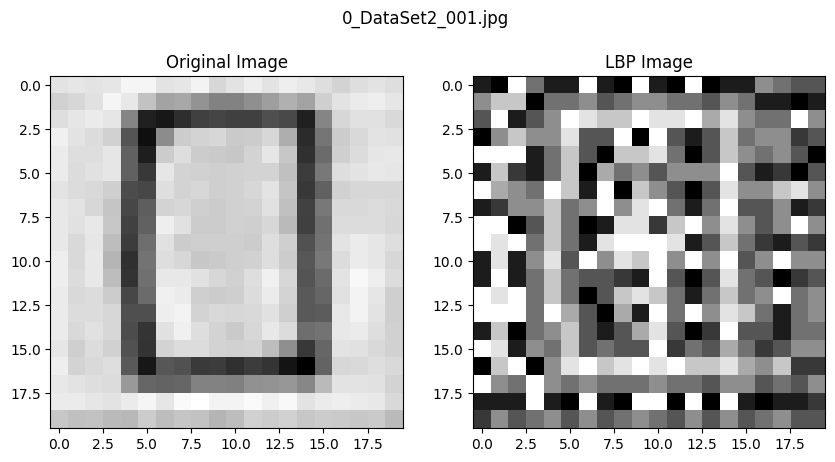

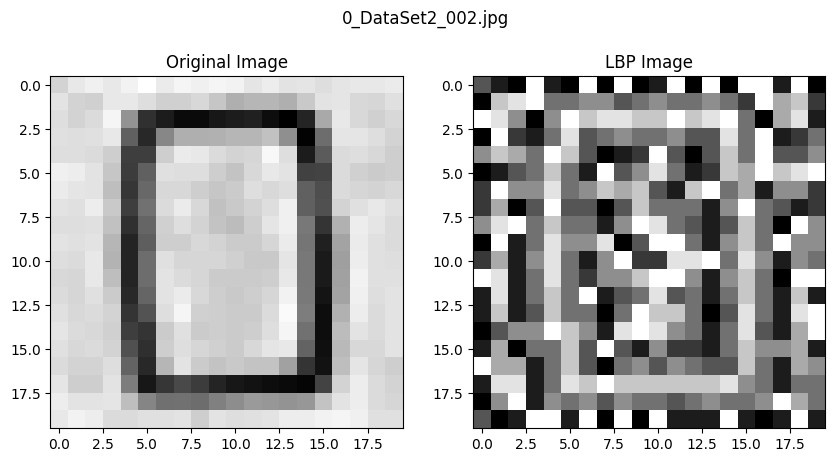

In [91]:
# Directory containing the preprocessed images
input_dir = './Proses/Pre/'

# Directory to save feature extraction results
output_dir = './Proses/EksLbp/'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Buat list untuk menyimpan fitur dan label
features_2 = []
labels_2 = []

# Parameters for LBP
radius = 1
n_points = 8 * radius

# Get a list of all files in the input directory
file_path = os.listdir(input_dir)

# Menginisialisasi penghitung untuk gambar yang ditampilkan
dis_count = 0

# Iterate over each file in the directory
for filename in file_path:
    # Check if the file is an image file
    if filename.endswith('.jpg'):
        # Construct full file paths
        input_path = os.path.join(input_dir, filename)
        
        label = int(filename.split('_')[0])
        
        # Read the preprocessed image using OpenCV
        preprocessed_image = cv.imread(input_path, cv.IMREAD_GRAYSCALE)
        
        resize_image = cv.resize(preprocessed_image, (20,20))
        
        # Apply LBP
        lbp = local_binary_pattern(resize_image, n_points, radius, method='uniform')
        
        # Convert the LBP image to a histogram
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3),
                                 range=(0, n_points + 2))
        
        # Normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        
        features_2.append(hist)
        labels_2.append(label)
        
        if dis_count < 2:
            # Display the original and LBP images
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            fig.suptitle(filename)
            axs[0].imshow(preprocessed_image, cmap='gray')
            axs[0].set_title('Original Image')
            axs[1].imshow(lbp, cmap='gray')
            axs[1].set_title('LBP Image')
            plt.show()
            dis_count += 1

## Mengubah ke data Training dan Testing

In [92]:
# Convert features and labels to NumPy arrays
X_no = np.array(features_no)
y_no = np.array(labels_no)

X_otsu = np.array(features)
y_otsu = np.array(labels)

X_lbp = np.array(features_2)
y_lbp = np.array(labels_2)

print('No Ektraksi fitur : ', X_no.shape)
print('No Ektraksi fitur : ', y_no.shape)

print('Ektraksi fitur Otsu : ',X_otsu.shape)
print('Ektraksi fitur Otsu : ',y_otsu.shape)

print('Ektraksi fitur LBP : ',X_lbp.shape)
print('Ektraksi fitur LBP : ',y_lbp.shape)

No Ektraksi fitur :  (7543, 400)
No Ektraksi fitur :  (7543,)
Ektraksi fitur Otsu :  (7543, 400)
Ektraksi fitur Otsu :  (7543,)
Ektraksi fitur LBP :  (7543, 10)
Ektraksi fitur LBP :  (7543,)


In [102]:
# Standardize the features
scaler = StandardScaler()
X_scaled_no = scaler.fit_transform(X_no)
X_scaled_otsu = scaler.fit_transform(X_otsu)
X_scaled_lbp = scaler.fit_transform(X_lbp)

# Apply PCA
pca = PCA(n_components=50)  # Reduce to 50 principal components
X_pca = pca.fit_transform(X_scaled_no)

print(X_scaled_no.shape)
print(X_scaled_otsu.shape)
print(X_scaled_lbp.shape)

# Split the data into training and testing sets
X_train_no1, X_test_no1, y_train_no1, y_test_no1 = train_test_split(X_scaled_no, y_no, test_size=0.4, random_state=42)
X_train_no2, X_test_no2, y_train_no2, y_test_no2 = train_test_split(X_scaled_no, y_no, test_size=0.3, random_state=42)
X_train_no3, X_test_no3, y_train_no3, y_test_no3 = train_test_split(X_scaled_no, y_no, test_size=0.2, random_state=42)

X_train_pca1, X_test_pca1, y_train_pca1, y_test_pca1 = train_test_split(X_pca, y_no, test_size=0.4, random_state=42)
X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca, y_no, test_size=0.3, random_state=42)
X_train_pca3, X_test_pca3, y_train_pca3, y_test_pca3 = train_test_split(X_pca, y_no, test_size=0.2, random_state=42)

X_train_otsu1, X_test_otsu1, y_train_otsu1, y_test_otsu1 = train_test_split(X_scaled_otsu, y_otsu, test_size=0.4, random_state=42)
X_train_otsu2, X_test_otsu2, y_train_otsu2, y_test_otsu2 = train_test_split(X_scaled_otsu, y_otsu, test_size=0.3, random_state=42)
X_train_otsu3, X_test_otsu3, y_train_otsu3, y_test_otsu3 = train_test_split(X_scaled_otsu, y_otsu, test_size=0.2, random_state=42)

X_train_lbp1, X_test_lbp1, y_train_lbp1, y_test_lbp1 = train_test_split(X_scaled_lbp, y_lbp, test_size=0.4, random_state=42)
X_train_lbp2, X_test_lbp2, y_train_lbp2, y_test_lbp2 = train_test_split(X_scaled_lbp, y_lbp, test_size=0.3, random_state=42)
X_train_lbp3, X_test_lbp3, y_train_lbp3, y_test_lbp3 = train_test_split(X_scaled_lbp, y_lbp, test_size=0.2, random_state=42)

(7543, 400)
(7543, 400)
(7543, 10)


## Klasifikasi

### KNN

#### 60 : 40

In [103]:
# Klasifikasi KNN No Ekstraksi fitur
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_no1, y_train_no1)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_no1, y_train_no1)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_no1)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_no1, y_pred_knn)
print(f'Akurasi KNN dan No Eks: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_no1, y_pred_knn)
print('Laporan Klasifikasi KNN dan No Eks:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan No Eks: 55.37%
Laporan Klasifikasi KNN dan No Eks:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66       321
           1       0.56      0.91      0.69       317
           2       0.68      0.47      0.56       299
           3       0.46      0.49      0.47       311
           4       0.58      0.82      0.68       270
           5       0.54      0.44      0.49       317
           6       0.52      0.40      0.45       300
           7       0.62      0.67      0.65       290
           8       0.51      0.34      0.41       308
           9       0.37      0.33      0.35       285

    accuracy                           0.55      3018
   macro avg       0.55      0.55      0.54      3018
weighted avg       0.55      0.55      0.54      3018



In [106]:
# Klasifikasi KNN PCA
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_pca1, y_train_pca1)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_pca1, y_train_pca1)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_pca1)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_pca1, y_pred_knn)
print(f'Akurasi KNN dan pca: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_pca1, y_pred_knn)
print('Laporan Klasifikasi KNN dan pca:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan pca: 56.79%
Laporan Klasifikasi KNN dan pca:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       321
           1       0.63      0.90      0.74       317
           2       0.65      0.54      0.59       299
           3       0.47      0.48      0.48       311
           4       0.62      0.80      0.70       270
           5       0.53      0.50      0.52       317
           6       0.53      0.43      0.47       300
           7       0.66      0.64      0.65       290
           8       0.48      0.36      0.41       308
           9       0.36      0.35      0.36       285

    accuracy                           0.57      3018
   macro avg       0.56      0.57      0.56      3018
weighted avg       0.56      0.57      0.56      3018



In [104]:
# Klasifikasi KNN Otsu
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_otsu1, y_train_otsu1)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_otsu1, y_train_otsu1)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_otsu1)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_otsu1, y_pred_knn)
print(f'Akurasi KNN dan otsu: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_otsu1, y_pred_knn)
print('Laporan Klasifikasi KNN dan otsu:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan otsu: 62.49%
Laporan Klasifikasi KNN dan otsu:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       321
           1       0.56      0.93      0.70       317
           2       0.80      0.56      0.65       299
           3       0.59      0.52      0.55       311
           4       0.63      0.80      0.70       270
           5       0.61      0.56      0.58       317
           6       0.66      0.55      0.60       300
           7       0.56      0.82      0.66       290
           8       0.63      0.38      0.47       308
           9       0.54      0.44      0.48       285

    accuracy                           0.62      3018
   macro avg       0.64      0.63      0.62      3018
weighted avg       0.64      0.62      0.62      3018



In [105]:
# Klasifikasi KNN Lbp
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_lbp1, y_train_lbp1)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_lbp1, y_train_lbp1)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_lbp1)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_lbp1, y_pred_knn)
print(f'Akurasi KNN dan lbp: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_lbp1, y_pred_knn)
print('Laporan Klasifikasi KNN dan lbp:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan lbp: 16.47%
Laporan Klasifikasi KNN dan lbp:
               precision    recall  f1-score   support

           0       0.28      0.24      0.26       321
           1       0.39      0.34      0.36       317
           2       0.11      0.10      0.10       299
           3       0.13      0.14      0.13       311
           4       0.11      0.15      0.12       270
           5       0.15      0.13      0.14       317
           6       0.11      0.11      0.11       300
           7       0.13      0.12      0.13       290
           8       0.15      0.15      0.15       308
           9       0.13      0.16      0.14       285

    accuracy                           0.16      3018
   macro avg       0.17      0.16      0.17      3018
weighted avg       0.17      0.16      0.17      3018



#### 70 : 30

In [108]:
# Klasifikasi KNN No Ekstraksi fitur
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_no2, y_train_no2)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_no2, y_train_no2)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_no2)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_no2, y_pred_knn)
print(f'Akurasi KNN dan No Eks: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_no2, y_pred_knn)
print('Laporan Klasifikasi KNN dan No Eks:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Akurasi KNN dan No Eks: 57.71%
Laporan Klasifikasi KNN dan No Eks:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       245
           1       0.59      0.90      0.71       240
           2       0.72      0.47      0.57       226
           3       0.49      0.52      0.50       224
           4       0.63      0.78      0.70       206
           5       0.55      0.47      0.51       232
           6       0.53      0.44      0.48       228
           7       0.68      0.69      0.68       218
           8       0.51      0.37      0.43       234
           9       0.37      0.39      0.38       210

    accuracy                           0.58      2263
   macro avg       0.58      0.58      0.57      2263
weighted avg       0.58      0.58      0.57      2263



In [109]:
# Klasifikasi KNN PCA
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_pca2, y_train_pca2)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_pca2, y_train_pca2)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_pca2)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_pca2, y_pred_knn)
print(f'Akurasi KNN dan pca: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_pca2, y_pred_knn)
print('Laporan Klasifikasi KNN dan pca:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan pca: 58.02%
Laporan Klasifikasi KNN dan pca:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       245
           1       0.66      0.89      0.76       240
           2       0.68      0.51      0.58       226
           3       0.51      0.54      0.52       224
           4       0.65      0.76      0.70       206
           5       0.52      0.48      0.50       232
           6       0.55      0.48      0.51       228
           7       0.73      0.68      0.70       218
           8       0.46      0.36      0.41       234
           9       0.33      0.38      0.35       210

    accuracy                           0.58      2263
   macro avg       0.58      0.58      0.57      2263
weighted avg       0.58      0.58      0.57      2263



In [110]:
# Klasifikasi KNN Otsu
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_otsu2, y_train_otsu2)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_otsu2, y_train_otsu2)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_otsu2)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_otsu2, y_pred_knn)
print(f'Akurasi KNN dan otsu: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_otsu2, y_pred_knn)
print('Laporan Klasifikasi KNN dan otsu:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan otsu: 64.03%
Laporan Klasifikasi KNN dan otsu:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       245
           1       0.58      0.94      0.71       240
           2       0.80      0.54      0.64       226
           3       0.56      0.54      0.55       224
           4       0.69      0.82      0.75       206
           5       0.63      0.61      0.62       232
           6       0.65      0.57      0.61       228
           7       0.58      0.83      0.68       218
           8       0.64      0.41      0.50       234
           9       0.56      0.43      0.48       210

    accuracy                           0.64      2263
   macro avg       0.65      0.64      0.63      2263
weighted avg       0.65      0.64      0.63      2263



In [111]:
# Klasifikasi KNN Lbp
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_lbp2, y_train_lbp2)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_lbp2, y_train_lbp2)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_lbp2)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_lbp2, y_pred_knn)
print(f'Akurasi KNN dan lbp: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_lbp2, y_pred_knn)
print('Laporan Klasifikasi KNN dan lbp:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Akurasi KNN dan lbp: 17.37%
Laporan Klasifikasi KNN dan lbp:
               precision    recall  f1-score   support

           0       0.28      0.24      0.26       245
           1       0.43      0.37      0.40       240
           2       0.10      0.09      0.09       226
           3       0.14      0.16      0.15       224
           4       0.15      0.17      0.16       206
           5       0.14      0.12      0.13       232
           6       0.12      0.11      0.11       228
           7       0.13      0.13      0.13       218
           8       0.17      0.18      0.17       234
           9       0.12      0.15      0.13       210

    accuracy                           0.17      2263
   macro avg       0.18      0.17      0.17      2263
weighted avg       0.18      0.17      0.18      2263



#### 80 : 20

In [112]:
# Klasifikasi KNN No Ekstraksi fitur
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_no3, y_train_no3)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_no3, y_train_no3)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_no3)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_no3, y_pred_knn)
print(f'Akurasi KNN dan No Eks: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_no3, y_pred_knn)
print('Laporan Klasifikasi KNN dan No Eks:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Akurasi KNN dan No Eks: 60.50%
Laporan Klasifikasi KNN dan No Eks:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       162
           1       0.59      0.89      0.71       161
           2       0.75      0.50      0.60       159
           3       0.48      0.56      0.51       141
           4       0.69      0.82      0.75       144
           5       0.57      0.50      0.53       150
           6       0.55      0.54      0.54       139
           7       0.72      0.74      0.73       159
           8       0.55      0.39      0.46       152
           9       0.42      0.37      0.39       142

    accuracy                           0.61      1509
   macro avg       0.60      0.60      0.59      1509
weighted avg       0.61      0.61      0.60      1509



In [113]:
# Klasifikasi KNN PCA
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_pca3, y_train_pca3)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_pca3, y_train_pca3)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_pca3)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_pca3, y_pred_knn)
print(f'Akurasi KNN dan pca: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_pca3, y_pred_knn)
print('Laporan Klasifikasi KNN dan pca:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan pca: 60.04%
Laporan Klasifikasi KNN dan pca:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       162
           1       0.67      0.89      0.76       161
           2       0.73      0.52      0.61       159
           3       0.48      0.55      0.51       141
           4       0.70      0.78      0.74       144
           5       0.56      0.50      0.53       150
           6       0.55      0.54      0.54       139
           7       0.75      0.72      0.74       159
           8       0.50      0.39      0.44       152
           9       0.36      0.37      0.36       142

    accuracy                           0.60      1509
   macro avg       0.60      0.60      0.59      1509
weighted avg       0.60      0.60      0.60      1509



In [114]:
# Klasifikasi KNN Otsu
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_otsu2, y_train_otsu2)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_otsu3, y_train_otsu3)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_otsu3)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_otsu3, y_pred_knn)
print(f'Akurasi KNN dan otsu: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_otsu3, y_pred_knn)
print('Laporan Klasifikasi KNN dan otsu:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan otsu: 65.94%
Laporan Klasifikasi KNN dan otsu:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       162
           1       0.59      0.94      0.73       161
           2       0.82      0.55      0.66       159
           3       0.61      0.62      0.61       141
           4       0.74      0.78      0.76       144
           5       0.60      0.57      0.58       150
           6       0.67      0.63      0.65       139
           7       0.62      0.84      0.71       159
           8       0.67      0.40      0.50       152
           9       0.56      0.46      0.50       142

    accuracy                           0.66      1509
   macro avg       0.67      0.66      0.65      1509
weighted avg       0.67      0.66      0.65      1509



In [115]:
# Klasifikasi KNN Lbp
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_model.fit(X_train_lbp3, y_train_lbp3)

# Menampilkan parameter terbaik
best_params_KNN = knn_model.best_params_
print("Parameter terbaik KNN:", best_params_KNN)

# Membuat dan melatih model SVM dengan parameter terbaik
knn_model1 = KNeighborsClassifier(**best_params_KNN)
knn_model1.fit(X_train_lbp3, y_train_lbp3)

# Memprediksi label untuk data uji
y_pred_knn = knn_model1.predict(X_test_lbp3)

# Evaluasi Klasifikasi
accuracy_knn = accuracy_score(y_test_lbp3, y_pred_knn)
print(f'Akurasi KNN dan lbp: {accuracy_knn * 100:.2f}%')

classification_rep_knn = classification_report(y_test_lbp3, y_pred_knn)
print('Laporan Klasifikasi KNN dan lbp:\n', classification_rep_knn)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi KNN dan lbp: 16.96%
Laporan Klasifikasi KNN dan lbp:
               precision    recall  f1-score   support

           0       0.29      0.27      0.28       162
           1       0.40      0.35      0.37       161
           2       0.10      0.08      0.09       159
           3       0.12      0.16      0.14       141
           4       0.14      0.15      0.15       144
           5       0.12      0.11      0.11       150
           6       0.13      0.15      0.14       139
           7       0.14      0.12      0.13       159
           8       0.17      0.17      0.17       152
           9       0.10      0.12      0.11       142

    accuracy                           0.17      1509
   macro avg       0.17      0.17      0.17      1509
weighted avg       0.17      0.17      0.17      1509



### Random Forest

#### 60 : 40

In [116]:
# Klasifikasi Random Forest No Ekstraksi fitur
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_no1, y_train_no1)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_no1, y_train_no1)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_no1)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_no1, y_pred_rf)
print(f'Akurasi RF dan No Eks: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_no1, y_pred_rf)
print('Laporan Klasifikasi RF dan No Eks:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 150}
Akurasi RF dan No Eks: 83.57%
Laporan Klasifikasi RF dan No Eks:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       321
           1       0.85      0.95      0.90       317
           2       0.89      0.86      0.88       299
           3       0.76      0.80      0.78       311
           4       0.89      0.91      0.90       270
           5       0.81      0.85      0.83       317
           6       0.79      0.87      0.83       300
           7       0.75      0.91      0.82       290
           8       0.90      0.67      0.77       308
           9       0.87      0.68      0.77       285

    accuracy                           0.84      3018
   macro avg       0.84      0.84      0.83      3018
weighted avg       0.84      0.84      0.83      3018



In [117]:
# Klasifikasi Random Forest pca
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_pca1, y_train_pca1)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_pca1, y_train_pca1)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_pca1)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_pca1, y_pred_rf)
print(f'Akurasi RF dan pca: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_pca1, y_pred_rf)
print('Laporan Klasifikasi RF dan pca:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}
Akurasi RF dan pca: 84.16%
Laporan Klasifikasi RF dan pca:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       321
           1       0.88      0.93      0.90       317
           2       0.90      0.85      0.87       299
           3       0.84      0.83      0.83       311
           4       0.87      0.87      0.87       270
           5       0.80      0.82      0.81       317
           6       0.74      0.89      0.81       300
           7       0.86      0.90      0.88       290
           8       0.86      0.67      0.76       308
           9       0.77      0.75      0.76       285

    accuracy                           0.84      3018
   macro avg       0.84      0.84      0.84      3018
weighted avg       0.84      0.84      0.84      3018



In [118]:
# Klasifikasi Random Forest otsu
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_otsu1, y_train_otsu1)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_otsu1, y_train_otsu1)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_otsu1)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_otsu1, y_pred_rf)
print(f'Akurasi RF dan otsu: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_otsu1, y_pred_rf)
print('Laporan Klasifikasi RF dan otsu:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 150}
Akurasi RF dan otsu: 89.03%
Laporan Klasifikasi RF dan otsu:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       321
           1       0.89      0.96      0.92       317
           2       0.94      0.91      0.93       299
           3       0.82      0.87      0.85       311
           4       0.96      0.94      0.95       270
           5       0.86      0.88      0.87       317
           6       0.84      0.89      0.87       300
           7       0.86      0.94      0.90       290
           8       0.95      0.78      0.85       308
           9       0.89      0.82      0.86       285

    accuracy                           0.89      3018
   macro avg       0.89      0.89      0.89      3018
weighted avg       0.89      0.89      0.89      3018



In [119]:
# Klasifikasi Random Forest lbp
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_lbp1, y_train_lbp1)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_lbp1, y_train_lbp1)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_lbp1)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_lbp1, y_pred_rf)
print(f'Akurasi RF dan lbp: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_lbp1, y_pred_rf)
print('Laporan Klasifikasi RF dan lbp:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
Akurasi RF dan lbp: 19.91%
Laporan Klasifikasi RF dan lbp:
               precision    recall  f1-score   support

           0       0.35      0.32      0.33       321
           1       0.37      0.49      0.42       317
           2       0.11      0.07      0.09       299
           3       0.14      0.12      0.13       311
           4       0.14      0.20      0.17       270
           5       0.17      0.14      0.15       317
           6       0.13      0.10      0.11       300
           7       0.17      0.16      0.16       290
           8       0.18      0.20      0.19       308
           9       0.15      0.17      0.16       285

    accuracy                           0.20      3018
   macro avg       0.19      0.20      0.19      3018
weighted avg       0.19      0.20      0.19      3018



#### 70 : 30

In [120]:
# Klasifikasi Random Forest No Ekstraksi fitur
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_no2, y_train_no2)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_no2, y_train_no2)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_no2)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_no2, y_pred_rf)
print(f'Akurasi RF dan No Eks: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_no2, y_pred_rf)
print('Laporan Klasifikasi RF dan No Eks:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 150}
Akurasi RF dan No Eks: 84.89%
Laporan Klasifikasi RF dan No Eks:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       245
           1       0.85      0.97      0.90       240
           2       0.90      0.87      0.89       226
           3       0.78      0.84      0.81       224
           4       0.89      0.90      0.90       206
           5       0.82      0.85      0.83       232
           6       0.80      0.89      0.84       228
           7       0.80      0.94      0.86       218
           8       0.90      0.67      0.77       234
           9       0.85      0.68      0.76       210

    accuracy                           0.85      2263
   macro avg       0.85      0.85      0.85      2263
weighted avg       0.85      0.85      0.85      2263



In [121]:
# Klasifikasi Random Forest pca
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_pca2, y_train_pca2)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_pca2, y_train_pca2)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_pca2)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_pca2, y_pred_rf)
print(f'Akurasi RF dan pca: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_pca2, y_pred_rf)
print('Laporan Klasifikasi RF dan pca:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 150}
Akurasi RF dan pca: 84.89%
Laporan Klasifikasi RF dan pca:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       245
           1       0.88      0.95      0.91       240
           2       0.89      0.85      0.87       226
           3       0.90      0.80      0.85       224
           4       0.87      0.88      0.88       206
           5       0.79      0.84      0.81       232
           6       0.76      0.88      0.82       228
           7       0.89      0.92      0.90       218
           8       0.83      0.66      0.74       234
           9       0.74      0.77      0.76       210

    accuracy                           0.85      2263
   macro avg       0.85      0.85      0.85      2263
weighted avg       0.85      0.85      0.85      2263



In [122]:
# Klasifikasi Random Forest otsu
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_otsu2, y_train_otsu2)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_otsu2, y_train_otsu2)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_otsu2)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_otsu2, y_pred_rf)
print(f'Akurasi RF dan otsu: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_otsu2, y_pred_rf)
print('Laporan Klasifikasi RF dan otsu:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 150}
Akurasi RF dan otsu: 89.26%
Laporan Klasifikasi RF dan otsu:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       245
           1       0.89      0.97      0.93       240
           2       0.94      0.91      0.92       226
           3       0.81      0.88      0.84       224
           4       0.95      0.92      0.94       206
           5       0.85      0.89      0.87       232
           6       0.85      0.89      0.87       228
           7       0.91      0.94      0.93       218
           8       0.96      0.77      0.86       234
           9       0.90      0.82      0.86       210

    accuracy                           0.89      2263
   macro avg       0.90      0.89      0.89      2263
weighted avg       0.90      0.89      0.89      2263



In [123]:
# Klasifikasi Random Forest lbp
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_lbp2, y_train_lbp2)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_lbp2, y_train_lbp2)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_lbp2)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_lbp2, y_pred_rf)
print(f'Akurasi RF dan lbp: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_lbp2, y_pred_rf)
print('Laporan Klasifikasi RF dan lbp:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}
Akurasi RF dan lbp: 20.99%
Laporan Klasifikasi RF dan lbp:
               precision    recall  f1-score   support

           0       0.35      0.35      0.35       245
           1       0.39      0.53      0.45       240
           2       0.13      0.08      0.09       226
           3       0.15      0.14      0.15       224
           4       0.18      0.21      0.20       206
           5       0.16      0.14      0.15       232
           6       0.09      0.05      0.06       228
           7       0.14      0.13      0.14       218
           8       0.21      0.25      0.23       234
           9       0.13      0.19      0.15       210

    accuracy                           0.21      2263
   macro avg       0.19      0.21      0.20      2263
weighted avg       0.20      0.21      0.20      2263



#### 80 : 20

In [124]:
# Klasifikasi Random Forest No Ekstraksi fitur
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_no3, y_train_no3)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_no3, y_train_no3)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_no3)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_no3, y_pred_rf)
print(f'Akurasi RF dan No Eks: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_no3, y_pred_rf)
print('Laporan Klasifikasi RF dan No Eks:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 150}
Akurasi RF dan No Eks: 85.49%
Laporan Klasifikasi RF dan No Eks:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       162
           1       0.86      0.98      0.91       161
           2       0.93      0.89      0.91       159
           3       0.74      0.79      0.76       141
           4       0.88      0.93      0.91       144
           5       0.83      0.89      0.86       150
           6       0.80      0.88      0.84       139
           7       0.83      0.91      0.87       159
           8       0.85      0.69      0.76       152
           9       0.89      0.70      0.79       142

    accuracy                           0.85      1509
   macro avg       0.86      0.85      0.85      1509
weighted avg       0.86      0.85      0.85      1509



In [125]:
# Klasifikasi Random Forest pca
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_pca3, y_train_pca3)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_pca3, y_train_pca3)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_pca3)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_pca3, y_pred_rf)
print(f'Akurasi RF dan pca: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_pca3, y_pred_rf)
print('Laporan Klasifikasi RF dan pca:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}
Akurasi RF dan pca: 84.49%
Laporan Klasifikasi RF dan pca:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       162
           1       0.90      0.98      0.94       161
           2       0.89      0.80      0.84       159
           3       0.85      0.82      0.83       141
           4       0.86      0.89      0.87       144
           5       0.76      0.81      0.78       150
           6       0.75      0.86      0.80       139
           7       0.94      0.91      0.92       159
           8       0.83      0.72      0.77       152
           9       0.75      0.73      0.74       142

    accuracy                           0.84      1509
   macro avg       0.84      0.84      0.84      1509
weighted avg       0.85      0.84      0.84      1509



In [126]:
# Klasifikasi Random Forest otsu
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_otsu3, y_train_otsu3)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_otsu3, y_train_otsu3)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_otsu3)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_otsu3, y_pred_rf)
print(f'Akurasi RF dan otsu: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_otsu3, y_pred_rf)
print('Laporan Klasifikasi RF dan otsu:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 150}
Akurasi RF dan otsu: 90.66%
Laporan Klasifikasi RF dan otsu:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       162
           1       0.92      0.99      0.95       161
           2       0.96      0.89      0.92       159
           3       0.83      0.93      0.88       141
           4       0.94      0.95      0.94       144
           5       0.86      0.87      0.87       150
           6       0.84      0.89      0.87       139
           7       0.92      0.92      0.92       159
           8       0.96      0.85      0.90       152
           9       0.96      0.82      0.89       142

    accuracy                           0.91      1509
   macro avg       0.91      0.91      0.91      1509
weighted avg       0.91      0.91      0.91      1509



In [127]:
# Klasifikasi Random Forest lbp
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf_model.fit(X_train_lbp3, y_train_lbp3)

# Menampilkan parameter terbaik
best_params_RF = rf_model.best_params_
print("Parameter terbaik Random Forest:", best_params_RF)

# Membuat dan melatih model SVM dengan parameter terbaik
rf_model1 = RandomForestClassifier(**best_params_RF)
rf_model1.fit(X_train_lbp3, y_train_lbp3)

# Memprediksi label untuk data uji
y_pred_rf = rf_model1.predict(X_test_lbp3)

# Evaluasi Klasifikasi
accuracy_rf = accuracy_score(y_test_lbp3, y_pred_rf)
print(f'Akurasi RF dan lbp: {accuracy_rf * 100:.2f}%')

classification_rep_rf = classification_report(y_test_lbp3, y_pred_rf)
print('Laporan Klasifikasi RF dan lbp:\n', classification_rep_rf)

Parameter terbaik Random Forest: {'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 150}
Akurasi RF dan lbp: 21.34%
Laporan Klasifikasi RF dan lbp:
               precision    recall  f1-score   support

           0       0.33      0.38      0.35       162
           1       0.38      0.56      0.45       161
           2       0.10      0.06      0.07       159
           3       0.14      0.16      0.15       141
           4       0.17      0.17      0.17       144
           5       0.16      0.17      0.17       150
           6       0.13      0.08      0.10       139
           7       0.19      0.13      0.15       159
           8       0.19      0.22      0.21       152
           9       0.15      0.17      0.16       142

    accuracy                           0.21      1509
   macro avg       0.19      0.21      0.20      1509
weighted avg       0.20      0.21      0.20      1509

